In [2]:
import os
import pandas as pd

DATA_DIR = r"C:\Users\louis\Downloads\Data Technician Bootcamp\Week x - Projects\Road Fuel\fuel_data"

files = {
    2020: os.path.join(DATA_DIR, "Historical_sub_regional_forecourt_metrics_2020.xlsx"),
    2021: os.path.join(DATA_DIR, "Historical_sub_regional_forecourt_metrics_2021.xlsx"),
    2022: os.path.join(DATA_DIR, "Historical_sub_regional_forecourt_metrics_2022.xlsx"),
    2023: os.path.join(DATA_DIR, "Historical_sub_regional_metrics_2023.xlsx"),
    2024: os.path.join(DATA_DIR, "Historical_sub_regional_metrics_2024.xlsx"),
}

# quick check: confirm Python can see them
[(y, os.path.exists(p), p) for y, p in files.items()]


[(2020,
  True,
  'C:\\Users\\louis\\Downloads\\Data Technician Bootcamp\\Week x - Projects\\Road Fuel\\fuel_data\\Historical_sub_regional_forecourt_metrics_2020.xlsx'),
 (2021,
  True,
  'C:\\Users\\louis\\Downloads\\Data Technician Bootcamp\\Week x - Projects\\Road Fuel\\fuel_data\\Historical_sub_regional_forecourt_metrics_2021.xlsx'),
 (2022,
  True,
  'C:\\Users\\louis\\Downloads\\Data Technician Bootcamp\\Week x - Projects\\Road Fuel\\fuel_data\\Historical_sub_regional_forecourt_metrics_2022.xlsx'),
 (2023,
  True,
  'C:\\Users\\louis\\Downloads\\Data Technician Bootcamp\\Week x - Projects\\Road Fuel\\fuel_data\\Historical_sub_regional_metrics_2023.xlsx'),
 (2024,
  True,
  'C:\\Users\\louis\\Downloads\\Data Technician Bootcamp\\Week x - Projects\\Road Fuel\\fuel_data\\Historical_sub_regional_metrics_2024.xlsx')]

In [3]:
test_2020 = pd.read_excel(files[2020], skiprows=7)
test_2020.head()


C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\openpyxl\reader\workbook.py:118: UserWarning: Print area cannot be set to Defined name: 'About these Statistics'!$A:$A.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")
C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\openpyxl\reader\workbook.py:118: UserWarning: Print area cannot be set to Defined name: Contents!$A:$O.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Contents,NaN,NaN,NaN
1,Data sources,About these Statistics,NaN,NaN
2,NaN,Notes and definitions,NaN,NaN
3,Tables,Sub-regional data 2020,NaN,NaN
4,NaN,NaN,NaN,NaN


In [8]:
pd.ExcelFile(files[2020]).sheet_names


C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\openpyxl\reader\workbook.py:118: UserWarning: Print area cannot be set to Defined name: 'About these Statistics'!$A:$A.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")
C:\Users\louis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\openpyxl\reader\workbook.py:118: UserWarning: Print area cannot be set to Defined name: Contents!$A:$O.
  warn(f"Print area cannot be set to Defined name: {defn.value}.")


['Contents',
 'About these Statistics',
 'Notes and definitions',
 'Sub-regional data 2020']

In [9]:
test_2020 = pd.read_excel(
    files[2020],
    sheet_name="Sub-regional data 2020",
    skiprows=7
)

test_2020.head()


,Date,Weekday,Fuel Type,ITL1 Name,ITL1 Code,ITL2 Name,ITL2 Code,ITL3 Name,ITL3 Code,"Average Sales Per Filling Station,\nlitres","Average Deliveries Per Filling Station,\nlitres","Average Stock Level Per Filling Station,\n%"
0,2020-01-27 00:00:00,Monday,Diesel,North East,TLC,Tees Valley and Durham,TLC1,Hartlepool and Stockton-on-Tees,TLC11,13527.0,11027.0,44.531272
1,2020-01-27 00:00:00,Monday,Diesel,North East,TLC,Tees Valley and Durham,TLC1,South Teesside,TLC12,9588.0,7128.0,47.439504
2,2020-01-27 00:00:00,Monday,Diesel,North East,TLC,Tees Valley and Durham,TLC1,Darlington,TLC13,16678.0,17560.0,40.169827
3,2020-01-27 00:00:00,Monday,Diesel,North East,TLC,Tees Valley and Durham,TLC1,Durham,TLC14,11127.0,14095.0,51.354604
4,2020-01-27 00:00:00,Monday,Diesel,North East,TLC,"Northumberland, and Tyne and Wear",TLC2,Northumberland,TLC21,8893.0,10276.0,46.070798


In [12]:
import os
import re
import pandas as pd
import warnings

# Silence harmless openpyxl warnings
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")

# ------------------------------------------------------------------
# 1. File locations
# ------------------------------------------------------------------
DATA_DIR = r"C:\Users\louis\Downloads\Data Technician Bootcamp\Week x - Projects\Road Fuel\fuel_data"

files = {
    2020: os.path.join(DATA_DIR, "Historical_sub_regional_forecourt_metrics_2020.xlsx"),
    2021: os.path.join(DATA_DIR, "Historical_sub_regional_forecourt_metrics_2021.xlsx"),
    2022: os.path.join(DATA_DIR, "Historical_sub_regional_forecourt_metrics_2022.xlsx"),
    2023: os.path.join(DATA_DIR, "Historical_sub_regional_metrics_2023.xlsx"),
    2024: os.path.join(DATA_DIR, "Historical_sub_regional_metrics_2024.xlsx"),
}

# ------------------------------------------------------------------
# 2. Helper: find the correct data sheet
# ------------------------------------------------------------------
def find_data_sheet(sheet_names):
    for s in sheet_names:
        if re.search(r"sub[-\s]?regional\s+(data|table)", s, flags=re.IGNORECASE):
            return s
    raise ValueError(f"No sub-regional data/table sheet found. Sheets were: {sheet_names}")

# ------------------------------------------------------------------
# 3. Helper: standardise column names across years
# ------------------------------------------------------------------
def standardise_columns(df):
    df = df.copy()

    # Clean whitespace / line breaks
    df.columns = (
        df.columns.astype(str)
        .str.replace("\n", " ", regex=False)
        .str.replace("\r", " ", regex=False)
        .str.replace(r"\s+", " ", regex=True)
        .str.strip()
    )

    # Canonical column names
    rename_map = {
        # Sales
        "Average Sales Per Filling Station, litres": "avg_sales_litres",
        "Average Sales Per Filling Station litres": "avg_sales_litres",
        "Average Sales Per Filling Station. litres": "avg_sales_litres",

        # Deliveries
        "Average Deliveries Per Filling Station, litres": "avg_deliveries_litres",
        "Average Deliveries Per Filling Station litres": "avg_deliveries_litres",
        "Average Deliveries Per Filling Station. litres": "avg_deliveries_litres",

        # Stock levels
        "Average Stock Level Per Filling Station, %": "avg_stock_pct",
        "Average Stock Levels Per Filling Station, %": "avg_stock_pct",
        "Average Stock Levels Per Filling Station %": "avg_stock_pct",
        "Average Stock Levels Per Filling Station": "avg_stock_pct",
    }

    df = df.rename(columns={c: rename_map.get(c, c) for c in df.columns})
    return df

# ------------------------------------------------------------------
# 4. Load + clean + combine all years
# ------------------------------------------------------------------
dfs = []

for year, path in files.items():
    xls = pd.ExcelFile(path)
    sheet = find_data_sheet(xls.sheet_names)

    df = pd.read_excel(path, sheet_name=sheet, skiprows=7)
    df = standardise_columns(df)

    df["Year"] = year
    df["SourceSheet"] = sheet
    dfs.append(df)

combined = pd.concat(dfs, ignore_index=True)

# ------------------------------------------------------------------
# 5. Final basic cleanup
# ------------------------------------------------------------------
combined["Date"] = pd.to_datetime(combined["Date"], errors="coerce", dayfirst=True)
combined = combined.dropna(subset=["Date"]).sort_values("Date")

combined.head()


,Date,Weekday,Fuel Type,ITL1 Name,ITL1 Code,ITL2 Name,ITL2 Code,ITL3 Name,ITL3 Code,avg_sales_litres,avg_deliveries_litres,avg_stock_pct,Year,SourceSheet,Average Sales Per Filling Station,Average Deliveries Per Filling Station
0,2020-01-27,Monday,Diesel,North East,TLC,Tees Valley and Durham,TLC1,Hartlepool and Stockton-on-Tees,TLC11,13527.0,11027.0,44.531272,2020,Sub-regional data 2020,NaN,NaN
62596,2020-01-27,Monday,Petrol,South East,TLJ,"Surrey, East and West Sussex",TLJ2,West Sussex (South West),TLJ27,9671.0,12665.0,40.719328,2020,Sub-regional data 2020,NaN,NaN
62597,2020-01-27,Monday,Petrol,South East,TLJ,"Surrey, East and West Sussex",TLJ2,West Sussex (North East),TLJ28,9032.0,8847.0,40.966625,2020,Sub-regional data 2020,NaN,NaN
62598,2020-01-27,Monday,Petrol,South East,TLJ,Hampshire and Isle of Wight,TLJ3,Portsmouth,TLJ31,8570.0,10034.0,42.186061,2020,Sub-regional data 2020,NaN,NaN
62599,2020-01-27,Monday,Petrol,South East,TLJ,Hampshire and Isle of Wight,TLJ3,Southampton,TLJ32,6531.0,4594.0,42.957318,2020,Sub-regional data 2020,NaN,NaN


In [13]:
combined = combined.drop(
    columns=[c for c in combined.columns if c.startswith("Average ")],
    errors="ignore"
)


In [14]:
combined[["avg_sales_litres", "avg_deliveries_litres", "avg_stock_pct"]].describe()


,avg_sales_litres,avg_deliveries_litres,avg_stock_pct
count,588210.000000,588210.000000,989529.000000
mean,9576.374754,9566.426666,44.915147
std,4918.996591,5617.983419,7.031349
min,17.000000,0.000000,1.455002
25%,5917.000000,5536.000000,40.786214
50%,8301.000000,8460.000000,45.267449
75%,12753.000000,12793.000000,49.455259
max,48934.000000,58624.000000,90.407667


In [15]:
national = (
    combined
    .groupby(["Date", "Fuel Type"], as_index=False)
    .agg(
        avg_stock_pct=("avg_stock_pct", "mean"),
        avg_sales_litres=("avg_sales_litres", "mean"),
        avg_deliveries_litres=("avg_deliveries_litres", "mean")
    )
)

national.head()


,Date,Fuel Type,avg_stock_pct,avg_sales_litres,avg_deliveries_litres
0,2020-01-27,Diesel,47.715027,10836.614130,9877.271739
1,2020-01-27,Petrol,42.884031,6990.233696,6855.396739
2,2020-01-27,Total,45.189632,17826.880435,16732.711957
3,2020-01-28,Diesel,47.391160,11055.706522,10760.809783
4,2020-01-28,Petrol,42.917988,7092.625000,7092.679348


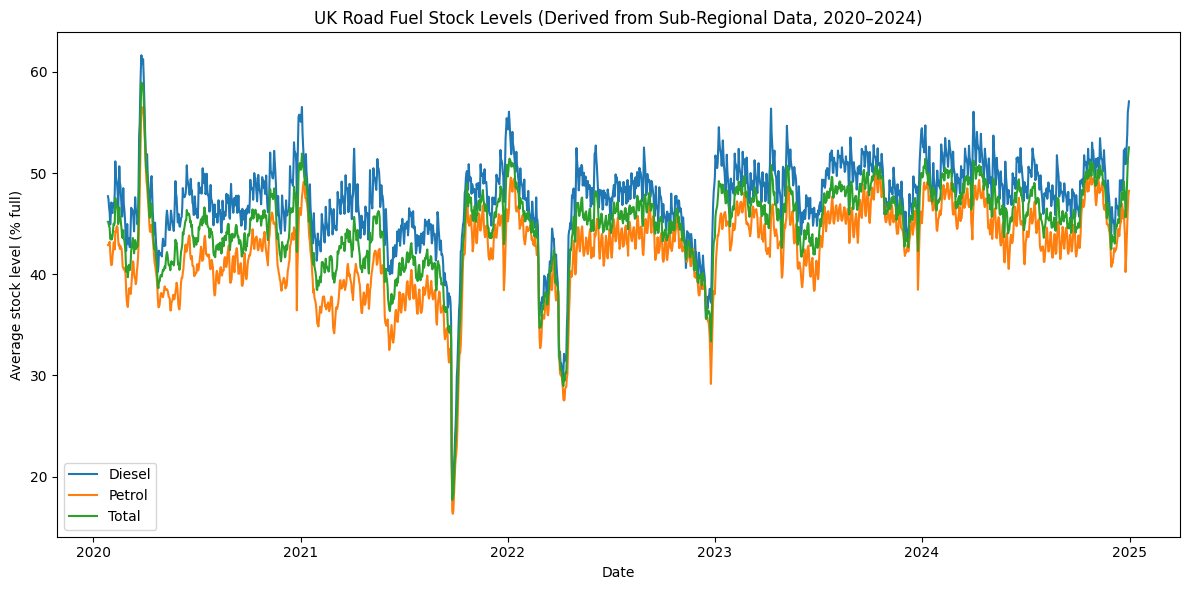

In [16]:
import matplotlib.pyplot as plt

pivot = national.pivot(
    index="Date",
    columns="Fuel Type",
    values="avg_stock_pct"
)

plt.figure(figsize=(12,6))
for fuel in pivot.columns:
    plt.plot(pivot.index, pivot[fuel], label=fuel)

plt.title("UK Road Fuel Stock Levels (Derived from Sub-Regional Data, 2020–2024)")
plt.xlabel("Date")
plt.ylabel("Average stock level (% full)")
plt.legend()
plt.tight_layout()
plt.show()


In [17]:
national.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5403 entries, 0 to 5402
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   5403 non-null   datetime64[ns]
 1   Fuel Type              5403 non-null   object        
 2   avg_stock_pct          5403 non-null   float64       
 3   avg_sales_litres       3210 non-null   float64       
 4   avg_deliveries_litres  3210 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 211.2+ KB


In [18]:
output_path = r"C:\Users\louis\Downloads\Data Technician Bootcamp\Week x - Projects\Road Fuel\fuel_data\uk_fuel_stock_levels_2020_2024.csv"

national.to_csv(output_path, index=False)

output_path


'C:\\Users\\louis\\Downloads\\Data Technician Bootcamp\\Week x - Projects\\Road Fuel\\fuel_data\\uk_fuel_stock_levels_2020_2024.csv'

In [19]:
itl2 = (
    combined
    .groupby(
        ["Date", "Fuel Type", "ITL2 Name", "ITL2 Code"],
        as_index=False
    )
    .agg(
        avg_stock_pct=("avg_stock_pct", "mean"),
        avg_sales_litres=("avg_sales_litres", "mean"),
        avg_deliveries_litres=("avg_deliveries_litres", "mean")
    )
)

itl2.head()


,Date,Fuel Type,ITL2 Name,ITL2 Code,avg_stock_pct,avg_sales_litres,avg_deliveries_litres
0,2020-01-27,Diesel,Bedfordshire and Hertfordshire,TLH2,47.560646,11832.500000,10295.25
1,2020-01-27,Diesel,"Berkshire, Buckinghamshire and Oxfordshire",TLJ1,46.662707,13020.250000,10731.25
2,2020-01-27,Diesel,Cheshire,TLD6,49.217908,13807.333333,12779.00
3,2020-01-27,Diesel,Cornwall and Isles of Scilly,TLK3,52.249229,12163.000000,10220.00
4,2020-01-27,Diesel,Cumbria,TLD1,50.908702,9247.000000,9858.50


In [20]:
itl2_path = r"C:\Users\louis\Downloads\Data Technician Bootcamp\Week x - Projects\Road Fuel\fuel_data\uk_fuel_stock_levels_itl2_2020_2024.csv"

itl2.to_csv(itl2_path, index=False)

itl2_path


'C:\\Users\\louis\\Downloads\\Data Technician Bootcamp\\Week x - Projects\\Road Fuel\\fuel_data\\uk_fuel_stock_levels_itl2_2020_2024.csv'

In [21]:
itl2.groupby("ITL2 Name")["avg_stock_pct"].mean().sort_values().head(10)


ITL2 Name
Outer London - South                              42.026567
Outer London - West and North West                42.607489
Berkshire, Buckinghamshire and Oxfordshire        43.450899
Merseyside                                        43.462846
South Yorkshire                                   43.506655
Greater Manchester                                43.637430
Derbyshire and Nottinghamshire                    43.760265
Shropshire and Staffordshire                      43.840630
West Midlands                                     43.849901
Herefordshire, Worcestershire and Warwickshire    43.972986
Name: avg_stock_pct, dtype: float64